In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)
from datetime import timedelta

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [53]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [56]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# most recent date 2017-08-23 in measurement

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print("Date: ", year_ago)

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

In [57]:


# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(date_prcp)

# find name of columns
# list(date_prcp_df.columns)

# set index to date
date_prcp_df.set_index('date', drop=True, inplace=True)
date_prcp_df.head()

# Sort the dataframe by date
date_prcp_df.sort_values(by=['date'])




,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


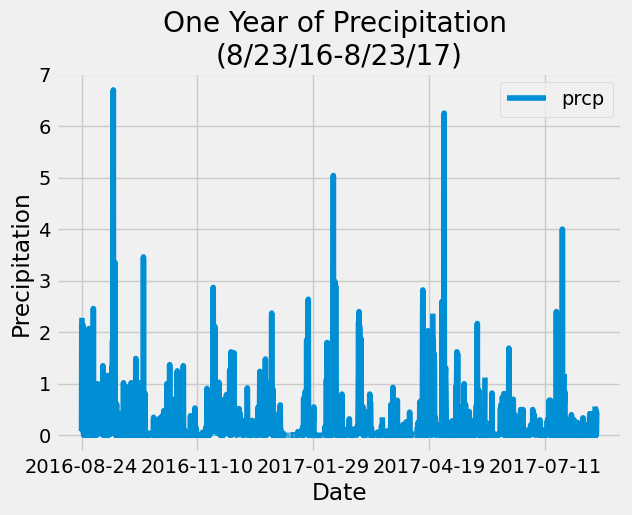

In [63]:
# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_df.plot.line()
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('''One Year of Precipitation 
(8/23/16-8/23/17)''')
plt.show()

In [65]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [81]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.id)).all()


[(9,)]

In [83]:
# Design a query to calculate the total number stations in the dataset measurements
session.query(func.count(Measurement.station)).all()

[(19550,)]

In [75]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Station.station,(func.count(Station.elevation))).\
    group_by(Station.station).\
    order_by(func.count(Station.elevation).desc())

station_activity.all()

[('USC00519523', 1),
 ('USC00519397', 1),
 ('USC00519281', 1),
 ('USC00518838', 1),
 ('USC00517948', 1),
 ('USC00516128', 1),
 ('USC00514830', 1),
 ('USC00513117', 1),
 ('USC00511918', 1)]

In [84]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station,(func.count(Measurement.station))).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc())

station_activity.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [89]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#The most active station is USC00519281
top_station = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station =='USC00519281')

top_station = pd.DataFrame(top_station)
top_station.head()

temps = top_station['tobs']
print(f'Highest temp: {(temps).max()}, Lowest temp: {(temps.min())}, Average temp: {(temps).mean()}')

Highest temp: 85.0, Lowest temp: 54.0, Average temp: 71.66378066378067


In [100]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
last_12_months_temp = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date >= year_ago).filter(Measurement.station == 'USC00519281')

# make into a Panda DataFrame
last_12_months_temp_pd = pd.DataFrame(last_12_months_temp)

last_12_months_temp_pd.set_index('date', drop=True, inplace=True)
last_12_months_temp_pd.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


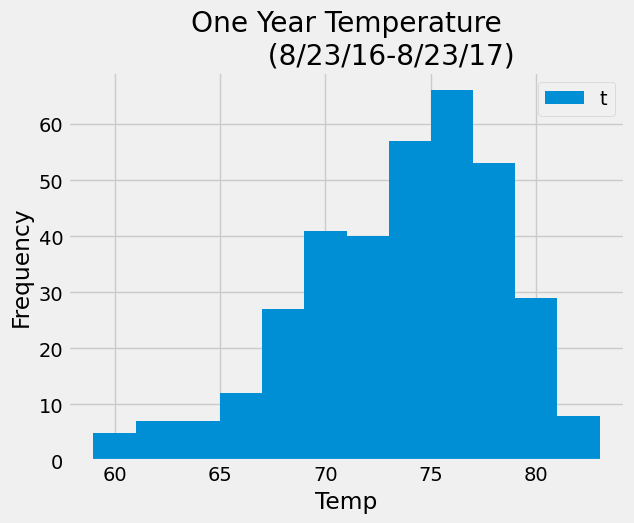

In [105]:
# and plot the results as a histogram
hist_data = last_12_months_temp_pd['tobs']
hist_data.hist(bins = 12)

# fontsize = 12
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.title('''One Year Temperature
          (8/23/16-8/23/17)''')
plt.legend('tobs')


plt.show()

# Close session

In [106]:
# Close Session
session.close()